In [1]:
import os

from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from helper_functions import plot_validation_curve
from byte_pair_tfidf_vectorizer import BytePairTfidfVectorizer

In [2]:
# load embeddings
train_data = pd.read_feather("data/train_embedding_bert_swiss_lm.feather")
dev_data = pd.read_feather("data/dev_embedding_bert_swiss_lm.feather")
#train_data = pd.read_feather("data/train_embeddings_swissbert.feather")
#dev_data = pd.read_feather("data/dev_embeddings_swissbert.feather")

In [3]:
train_labels = np.stack(train_data['label'])
dev_labels = np.stack(dev_data['label'])

### Bert embedding results

In [4]:
# GaussianNB on BERT embeddings
train_bert_embeddings = np.stack(train_data['sentence_embedding_first_state'])
dev_bert_embeddings = np.stack(dev_data['sentence_embedding_first_state'])

classifier = GaussianNB()
classifier.fit(train_bert_embeddings, train_labels)
train_prediction = classifier.predict(train_bert_embeddings)
val_prediction = classifier.predict(dev_bert_embeddings)
# calculate f1 score
train_score = f1_score(train_labels, train_prediction, average='macro')
val_score = f1_score(dev_labels, val_prediction, average='macro')
print(f"GaussianNB on BERT embeddings\ntrain score: {train_score}, val score: {val_score}")

GaussianNB on BERT embeddings
train score: 0.5936788755374012, val score: 0.6660514396068122


<Figure size 640x480 with 0 Axes>

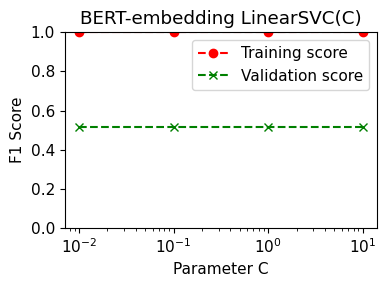

In [9]:
# LinearSVC on BERT embeddings
plot_validation_curve(train_bert_embeddings, train_labels,
                      dev_bert_embeddings, dev_labels,
                      classifier_class=LinearSVC, param_name='C', param_range=np.logspace(-2,1 , 4), title="BERT-embedding LinearSVC(C)")

<Figure size 640x480 with 0 Axes>

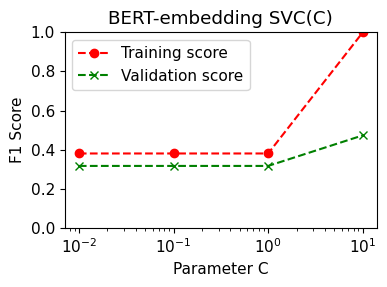

In [10]:
# SVC on BERT embeddings
plot_validation_curve(train_bert_embeddings, train_labels,
                      dev_bert_embeddings, dev_labels,
                      classifier_class=SVC, param_name='C', param_range=np.logspace(-2,1 , 4), title="BERT-embedding SVC(C)")

### Byte-Pair ID-IDF embedding results

In [5]:
# prepare embeddings
byte_pair_tfidf_vectorizer = BytePairTfidfVectorizer(vocab_size=1000, min_frequency=2)
byte_pair_vectorized = byte_pair_tfidf_vectorizer.fit_transform(train_data["text"].tolist())
dev_byte_pair_vectorized = byte_pair_tfidf_vectorizer.transform(dev_data["text"].tolist())

In [6]:
# GaussianNB on Byte-Pair ID-IDF
classifier = GaussianNB()
classifier.fit(byte_pair_vectorized, train_labels)
train_prediction = classifier.predict(byte_pair_vectorized)
val_prediction = classifier.predict(dev_byte_pair_vectorized)
# calculate f1 score
train_score = f1_score(train_labels, train_prediction, average='macro')
val_score = f1_score(dev_labels, val_prediction, average='macro')
print(f"GaussianNB on Byte-Pair ID-IDF\ntrain score: {train_score}, val score: {val_score}")

GaussianNB on Byte-Pair ID-IDF
train score: 0.6530515535229025, val score: 0.5310604568979002


<Figure size 640x480 with 0 Axes>

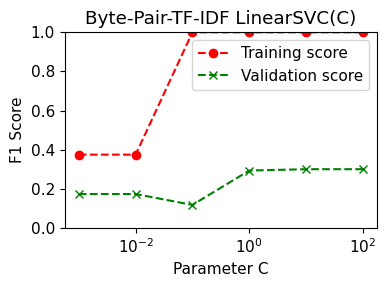

In [13]:
#LinearSVC on Byte-Pair ID-IDF
plot_validation_curve(byte_pair_vectorized, train_labels,
                      dev_byte_pair_vectorized, dev_labels,
                      classifier_class=LinearSVC, param_name='C', param_range=np.logspace(-3,2 , 6), title="Byte-Pair-TF-IDF LinearSVC(C)")

<Figure size 640x480 with 0 Axes>

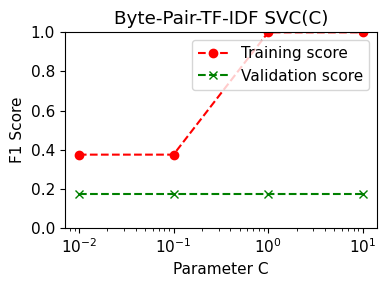

In [14]:
#SVC on Byte-Pair ID-IDF
plot_validation_curve(byte_pair_vectorized, train_labels,
                      dev_byte_pair_vectorized, dev_labels,
                      classifier_class=SVC, param_name='C', param_range=np.logspace(-2, 1, 4), title="Byte-Pair-TF-IDF SVC(C)")

### iVectors embedding results


In [7]:
#GaussionNB on iVectors
train_ivectors = np.stack(train_data['audio'].tolist())
dev_ivectors = np.stack(dev_data['audio'].tolist())

classifier = GaussianNB()
classifier.fit(train_ivectors, train_labels)
train_prediction = classifier.predict(train_ivectors)
val_prediction = classifier.predict(dev_ivectors)
# calculate f1 score
train_score = f1_score(train_labels, train_prediction, average='macro')
val_score = f1_score(dev_labels, val_prediction, average='macro')
print(f"GaussianNB on iVectors\ntrain score: {train_score}, val score: {val_score}")


GaussianNB on iVectors
train score: 0.9820751016480244, val score: 0.4271438507767193


<Figure size 640x480 with 0 Axes>

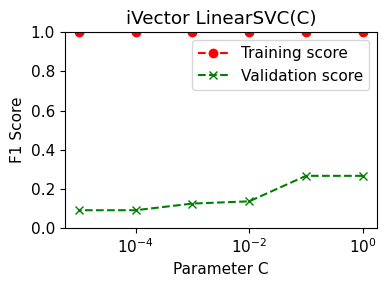

In [16]:
#LinearSVC on iVectors
plot_validation_curve(train_ivectors, train_labels,
                      dev_ivectors, dev_labels,
                      classifier_class=LinearSVC, param_name='C', param_range=np.logspace(0,-5 , 6), title="iVector LinearSVC(C)")

<Figure size 640x480 with 0 Axes>

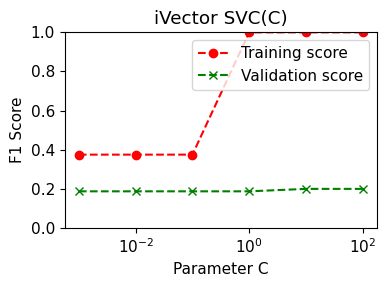

In [17]:
#SVC on iVectors
plot_validation_curve(train_ivectors, train_labels,
                      dev_ivectors, dev_labels,
                      classifier_class=SVC, param_name='C', param_range=np.logspace(-3,2 , 6), title="iVector SVC(C)")


### Validation curve for different vocab sizes for Byte-Pair-TF-IDF

<Figure size 640x480 with 0 Axes>

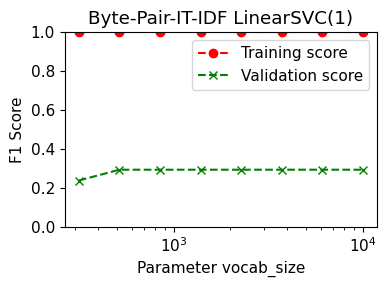

In [18]:

def plot_validation_curve_gaussian():
    train_scores = []
    val_scores = []
    param_range = np.logspace(2.5, 4, 8)
    for param in param_range:
        param = int(param)
        byte_pair_tfidf_vectorizer = BytePairTfidfVectorizer(vocab_size=param, min_frequency=2)
        byte_pair_vectorized = byte_pair_tfidf_vectorizer.fit_transform(train_data["text"].tolist())
        dev_byte_pair_vectorized = byte_pair_tfidf_vectorizer.transform(dev_data["text"].tolist())
        classifier = LinearSVC()
        classifier.fit(byte_pair_vectorized, train_data['label'].tolist())
        train_prediction = classifier.predict(byte_pair_vectorized)
        val_prediction = classifier.predict(dev_byte_pair_vectorized)
        # calculate f1 score
        train_score = f1_score(train_data['label'], train_prediction, average='macro')
        val_score = f1_score(dev_data['label'], val_prediction, average='macro')
        train_scores.append(train_score)
        val_scores.append(val_score)
    plt.subplots_adjust(bottom=0.55)
    plt.rcParams.update({'font.size': 11})

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xscale('log',base=10)
    ax.set_ylabel('F1 Score')
    ax.set_xlabel('Parameter vocab_size')
    ax.set_title("Byte-Pair-IT-IDF LinearSVC(1)")
    ax.set_ylim([0, 1])
    ax.plot(param_range, train_scores,linestyle='--', marker='o', color='r', label='Training score')
    ax.plot(param_range, val_scores, linestyle='--', marker='x',color='g', label='Validation score')
    ax.legend()
    plt.tight_layout()
    # save figure
    if not os.path.exists("graphics"):
        os.mkdir("graphics")
    fig.savefig(f"graphics/validation_curve_Byte-Pair-IT-IDF_LinearSVC(1)_big.pdf", dpi=300)
plot_validation_curve_gaussian()